In [154]:
import platform; print(platform.platform())
import sys; print("Python", sys.version)
import numpy; print("NumPy", numpy.__version__)
import scipy; print("SciPy", scipy.__version__)
import sklearn; print("Scikit-Learn", sklearn.__version__) 
import xgboost; print("XGBoost", xgboost.__version__)

Windows-10-10.0.19041-SP0
Python 3.8.8 (default, Apr 13 2021, 15:08:03) [MSC v.1916 64 bit (AMD64)]
NumPy 1.22.3
SciPy 1.9.1
Scikit-Learn 1.1.2
XGBoost 1.5.0


In [137]:
import warnings
warnings.filterwarnings('ignore')
### not recomment in real modelling

# Data Preprocessing

In [28]:
import pandas as pd
df_bikes = pd.read_csv("bike_rentals.csv")
df_bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1.0,0.0,1.0,0.0,6.0,0.0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1.0,0.0,1.0,0.0,0.0,0.0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1.0,0.0,1.0,0.0,1.0,1.0,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1.0,0.0,1.0,0.0,2.0,1.0,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1.0,0.0,1.0,0.0,3.0,1.0,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [30]:
df_bikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,730.000000,730.000000,731.000000,731.000000,731.000000,731.000000,730.000000,730.000000,728.000000,726.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500000,6.512329,0.028728,2.997264,0.682627,1.395349,0.495587,0.474512,0.627987,0.190476,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500343,3.448303,0.167155,2.004787,0.465773,0.544894,0.183094,0.163017,0.142331,0.077725,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.336875,0.337794,0.521562,0.134494,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,0.499166,0.487364,0.627083,0.180971,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,9.750000,0.000000,5.000000,1.000000,2.000000,0.655625,0.608916,0.730104,0.233218,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### 50% median close to mean, data is symmetrical

In [32]:
df_bikes.info() #general information about columns and rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    float64
 3   yr          730 non-null    float64
 4   mnth        730 non-null    float64
 5   holiday     731 non-null    float64
 6   weekday     731 non-null    float64
 7   workingday  731 non-null    float64
 8   weathersit  731 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         728 non-null    float64
 12  windspeed   726 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(10), int64(5), object(1)
memory usage: 91.5+ KB


### non-null count not consistent, there are null values

In [37]:
df_bikes.isna().sum()

instant       0
dteday        0
season        0
yr            1
mnth          1
holiday       0
weekday       0
workingday    0
weathersit    0
temp          1
atemp         1
hum           3
windspeed     5
casual        0
registered    0
cnt           0
dtype: int64

In [40]:
df_bikes[df_bikes.isna().any(axis=1)]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
56,57,2011-02-26,1.0,0.0,2.0,0.0,6.0,0.0,1,0.282500,0.282192,0.537917,NaN,424,1545,1969
81,82,2011-03-23,2.0,0.0,3.0,0.0,3.0,1.0,2,0.346957,0.337939,0.839565,NaN,203,1918,2121
128,129,2011-05-09,2.0,0.0,5.0,0.0,1.0,1.0,1,0.532500,0.525246,0.588750,NaN,664,3698,4362
129,130,2011-05-10,2.0,0.0,5.0,0.0,2.0,1.0,1,0.532500,0.522721,NaN,0.115671,694,4109,4803
213,214,2011-08-02,3.0,0.0,8.0,0.0,2.0,1.0,1,0.783333,0.707071,NaN,0.205850,801,4044,4845
298,299,2011-10-26,4.0,0.0,10.0,0.0,3.0,1.0,2,0.484167,0.472846,0.720417,NaN,404,3490,3894
388,389,2012-01-24,1.0,1.0,1.0,0.0,2.0,1.0,1,0.342500,0.349108,NaN,0.123767,439,3900,4339
528,529,2012-06-12,2.0,1.0,6.0,0.0,2.0,1.0,2,0.653333,0.597875,0.833333,NaN,477,4495,4972
701,702,2012-12-02,4.0,1.0,12.0,0.0,0.0,0.0,2,NaN,NaN,0.823333,0.124379,892,3757,4649
730,731,2012-12-31,1.0,NaN,NaN,0.0,1.0,0.0,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729


In [54]:
'''
df_bikes['windspeed'].describe()
windspeed_minZ = (df_bikes['windspeed'].min()- df_bikes['windspeed'].mean())/df_bikes['windspeed'].std()
windspeed_maxZ = (df_bikes['windspeed'].max()- df_bikes['windspeed'].mean())/df_bikes['windspeed'].std()
print(windspeed_maxZ,windspeed_minZ)
'''

4.078318635950721 -2.162548704459678


### Symmetical test to decide fillna value of windspeed

<AxesSubplot:xlabel='windspeed', ylabel='Density'>

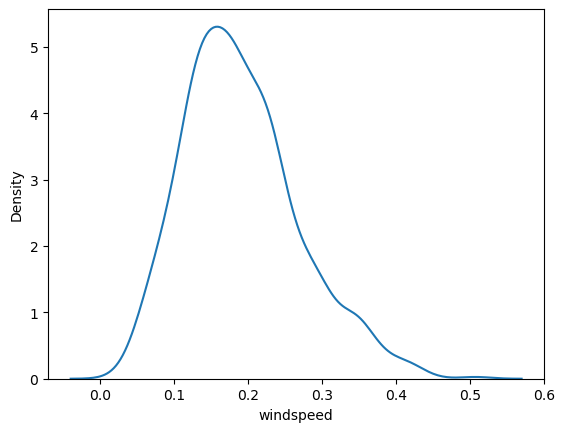

In [66]:
import seaborn as sns
fig,ax = plt.subplots()
sns.kdeplot(df_bikes['windspeed'])

In [79]:
import scipy
from scipy.stats import skew
from scipy.stats import kurtosis
print(skew(df_bikes[df_bikes['windspeed'].isna()==False]['windspeed'], axis=0, bias=True))
print(kurtosis(df_bikes[df_bikes['windspeed'].isna()==False]['windspeed'], axis=0, bias=True))

0.6750115414640216
0.38365674281704853


### The distribution roughly follows normal distribution, can fillna by mean or median, median first

In [82]:
df_bikes['windspeed'].fillna((df_bikes['windspeed'].median()), inplace=True)
df_bikes.iloc[[56, 81,128,298,528]]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
56,57,2011-02-26,1.0,0.0,2.0,0.0,6.0,0.0,1,0.282500,0.282192,0.537917,0.180971,424,1545,1969
81,82,2011-03-23,2.0,0.0,3.0,0.0,3.0,1.0,2,0.346957,0.337939,0.839565,0.180971,203,1918,2121
128,129,2011-05-09,2.0,0.0,5.0,0.0,1.0,1.0,1,0.532500,0.525246,0.588750,0.180971,664,3698,4362
298,299,2011-10-26,4.0,0.0,10.0,0.0,3.0,1.0,2,0.484167,0.472846,0.720417,0.180971,404,3490,3894
528,529,2012-06-12,2.0,1.0,6.0,0.0,2.0,1.0,2,0.653333,0.597875,0.833333,0.180971,477,4495,4972


### fill na in humidity by grouping season as three records belong to different seasons

In [86]:
df_bikes['hum']
df_bikes['hum'] = df_bikes['hum'].fillna(df_bikes.groupby('season')['hum'].transform('median'))

In [87]:
df_bikes.iloc[[129, 213, 388]]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
129,130,2011-05-10,2.0,0.0,5.0,0.0,2.0,1.0,1,0.532500,0.522721,0.646667,0.115671,694,4109,4803
213,214,2011-08-02,3.0,0.0,8.0,0.0,2.0,1.0,1,0.783333,0.707071,0.635833,0.205850,801,4044,4845
388,389,2012-01-24,1.0,1.0,1.0,0.0,2.0,1.0,1,0.342500,0.349108,0.543750,0.123767,439,3900,4339


### fill temp na,  sum the temperatures in rows 700 and 702 and divide by 2. Do this for the 'temp' and 'atemp' columns（Sample code）

In [102]:
df_bikes.iloc[[700,702]]

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
700,701,4.0,1.0,12,0.0,6.0,0.0,2,0.298333,0.316904,0.806667,0.059704,951,4240,5191
702,703,4.0,1.0,12,0.0,1.0,1.0,1,0.452500,0.455796,0.767500,0.082721,555,5679,6234


### Notes: Actually can fill median or mean by grouping by months

In [88]:
df_bikes[df_bikes['temp'].isna()]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
701,702,2012-12-02,4.0,1.0,12.0,0.0,0.0,0.0,2,NaN,NaN,0.823333,0.124379,892,3757,4649


In [89]:
mean_temp = (df_bikes.iloc[700]['temp'] + df_bikes.iloc[702]['temp'])/2 
mean_atemp = (df_bikes.iloc[700]['atemp'] + df_bikes.iloc[702]['atemp'])/2
df_bikes['temp'].fillna((mean_temp), inplace=True) 
df_bikes['atemp'].fillna((mean_atemp), inplace=True)

### Now process date na, for date, transformation through pandas is must

In [93]:
df_bikes['dteday'] = pd.to_datetime(df_bikes['dteday'],infer_datetime_format=True)
df_bikes['dteday']

0     2011-01-01
1     2011-01-02
2     2011-01-03
3     2011-01-04
4     2011-01-05
         ...    
726   2012-12-27
727   2012-12-28
728   2012-12-29
729   2012-12-30
730   2012-12-31
Name: dteday, Length: 731, dtype: datetime64[ns]

In [98]:
import datetime as dt
df_bikes['mnth'] = df_bikes['dteday'].dt.month
df_bikes['mnth'].head()
df_bikes['mnth'].tail()

726    12
727    12
728    12
729    12
730    12
Name: mnth, dtype: int64

In [99]:
df_bikes.loc[730, 'yr'] = 1.0

### del non-numerical values

In [100]:
df_bikes = df_bikes.drop('dteday', axis=1)

# In the bike rentals dataset, df_bikes['cnt'] is the number of bike rentals in a given day. Predicting this column would be of great use to a bike rental company

In [ ]:
#According to the dataset, df_bikes['cnt'] is the sum of df_bikes['casual'] and df_bikes['registered'].
#If df_bikes['registered'] and df_bikes['casual'] were included as input columns,
#predictions would always be 100%accurate since these columns would always sum to the correct result. 
#Although perfect predictions are ideal in theory, it makes no sense to include input columns that would be unknown in reality.

df_bikes = df_bikes.drop(['casual', 'registered'], axis=1)

In [106]:
df_bikes.to_csv('bike_rentals_cleaned.csv', index=False)

In [110]:
X = df_bikes.iloc[:,:-1]   #all rows included, :-1 means start at the first column and go all the way to the last column without including it. The second -1 takes the last column only.
y = df_bikes.iloc[:,-1]
X
y

0       985
1       801
2      1349
3      1562
4      1600
       ... 
726    2114
727    3095
728    1341
729    1796
730    2729
Name: cnt, Length: 731, dtype: int64

### Linear

In [140]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2) 
#choosing the seed of a pseudo-random number generator to ensure reproducible results

In [141]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)

In [142]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
#mse
mse = mean_squared_error(y_test, y_pred) 
rmse = np.sqrt(mse)
print("linear RMSE: %0.2f" % (rmse))

#mape
mape = mean_absolute_percentage_error(y_test, y_pred) 
print("linear MAPE: %0.2f" % (mape))

#r2
r2 = r2_score(y_test, y_pred) 
print("linear R-square: %0.2f" % (r2))

linear RMSE: 898.21
linear MAPE: 0.20
linear R-square: 0.79


In [135]:
df_bikes['cnt'].describe()

count     731.000000
mean     4504.348837
std      1937.211452
min        22.000000
25%      3152.000000
50%      4548.000000
75%      5956.000000
max      8714.000000
Name: cnt, dtype: float64

### With a range of 22 to 8714, a mean of 4504, and a standard deviation of 1937, an RMSE of 898 isn't bad, but it's not great either

### XGBoost

In [138]:
from xgboost import XGBRegressor
xg_reg = XGBRegressor()
xg_reg.fit(X_train, y_train)
y_pred = xg_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred) 
rmse = np.sqrt(mse)
print("XGBoost RMSE: %0.2f" % (rmse))

#mape
mape = mean_absolute_percentage_error(y_test, y_pred) 
print("XGBoost MAPE: %0.2f" % (mape))

#r2
r2 = r2_score(y_test, y_pred) 
print("XGBoost R-square: %0.2f" % (r2))

XGBoost RMSE: 705.11
XGBoost MAPE: 0.15
XGBoost R-square: 0.87


## Cross validation test with scoring == negative mse

### Cross validation with linear

In [148]:
from sklearn.model_selection import cross_val_score
model = LinearRegression()
scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=10)
print(scores)

'''
Why scoring='neg_mean_squared_error'? Scikit-learn is designed to select the highest score when training models. 
This works well for accuracy, but not for errors when the lowest is best. 
By taking the negative of each mean squared error, the lowest ends up being the highest.
This is compensated for later with rmse = np.sqrt(-scores), so the final results are positive.
'''

[ -254023.184597    -706523.99840198 -1301612.08252473  -530554.28645016
  -409851.78535971  -940801.36212315 -1284705.47755477 -1569626.37894129
 -1176435.35983868 -2031553.62469152]


"\nWhy\xa0scoring='neg_mean_squared_error'? Scikit-learn is designed to select the highest score when training models. \nThis works well for accuracy, but not for errors when the lowest is best. \nBy taking the negative of each mean squared error, the lowest ends up being the highest.\nThis is compensated for later with\xa0rmse = np.sqrt(-scores), so the final results are positive.\n"

In [150]:
rmse = np.sqrt(-scores)
print('Reg rmse:', np.round(rmse, 2))
print('RMSE mean: %0.2f' % (rmse.mean()))

'''
Linear regression has a mean error of 972.06. This is slightly better than the 980.38 obtained before. 
The point here is not whether the score is better or worse. 
The point is that it's a better estimation of how linear regression will perform on unseen data.
Using cross-validation is always recommended for a better estimate of the score.
'''

Reg rmse: [ 504.01  840.55 1140.88  728.39  640.2   969.95 1133.45 1252.85 1084.64
 1425.33]
RMSE mean: 972.02


### Cross validation with XGBoost

In [151]:
model = XGBRegressor()
scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=10)
rmse = np.sqrt(-scores)
print('Reg rmse:', np.round(rmse, 2)) 
print('RMSE mean: %0.2f' % (rmse.mean()))

'''
XGBRegressor wins again, besting linear regression by about 10%.
'''

Reg rmse: [ 717.65  692.8   520.7   737.68  835.96 1006.24  991.34  747.61  891.99
 1731.13]
RMSE mean: 887.31
